In [ ]:
# Importo las librerias que usare en este notebook
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def load_sns_data(name=None):
  df_ = sns.load_dataset(name)
  print(' Variables o columnas: ')
  print(df_.columns)
  print('Types')
  print(df_.info())

  return df_

In [ ]:
anscombe = load_sns_data('anscombe')
anscombe.head()

 Variables o columnas: 
Index(['dataset', 'x', 'y'], dtype='object')
Types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB
None


,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


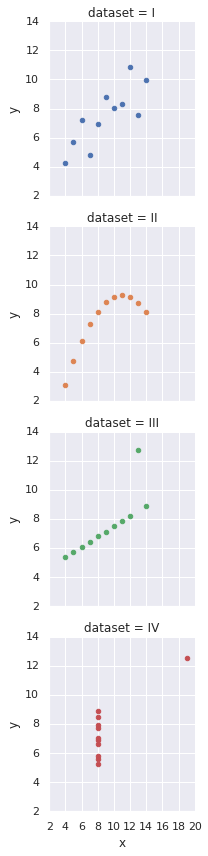

In [ ]:
g = sns.FacetGrid(anscombe, row='dataset', hue='dataset')
g = g.map(plt.scatter, 'x', 'y')